# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You have to include the full link to the csv file containing your dataset

dataset = pd.read_csv('/content/drive/MyDrive/Business_case/Datasets/Marketing_data.csv')
dataset

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
dataset.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
dataset.describe()
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Let's see who made one off purchase of $40761!
dataset[dataset.ONEOFF_PURCHASES==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
dataset[dataset.CASH_ADVANCE == dataset.CASH_ADVANCE.max()] 


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

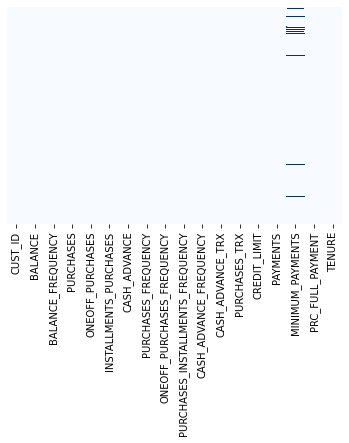

In [ ]:
# Let's see if we have any missing data
sns.heatmap(dataset.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [ ]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


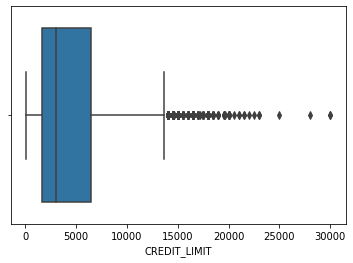

In [ ]:
# check for outliers to determine which measure of center to use
sns.boxplot(dataset.CREDIT_LIMIT)

In [ ]:
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    for x in data:
        z_score= (x - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(x)
    return outliers

In [ ]:
print(f'#Outliers : {len(detect_outlier(dataset.CREDIT_LIMIT))}')

#Outliers : 152


In [ ]:
# Fill up the missing elements with median of the 'CREDIT_LIMIT' 
dataset.CREDIT_LIMIT.fillna(dataset.CREDIT_LIMIT.median(),inplace=True)

In [ ]:
dataset.CREDIT_LIMIT.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


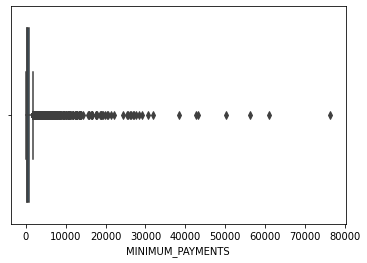

#Outliers : 100


In [ ]:
# check for outliers to determine which mean of center to use
sns.boxplot(dataset.MINIMUM_PAYMENTS)
plt.show()
print(f'#Outliers : {len(detect_outlier(dataset.MINIMUM_PAYMENTS))}')

In [ ]:
dataset.MINIMUM_PAYMENTS.isnull().sum()

313

In [ ]:
# Fill up the missing elements with median of the 'MINIMUM_PAYMENT' 
dataset.MINIMUM_PAYMENTS.fillna(dataset.MINIMUM_PAYMENTS.median(),inplace=True)

In [ ]:
dataset.MINIMUM_PAYMENTS.isnull().sum()

0

In [ ]:
# Let's see if we have duplicated entries in the data
dataset.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here 
dataset.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
dataset.sample(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6596,1969.647597,1.0,0.00,0.00,0.0,1973.843982,0.00,0.000000,0.000000,0.333333,5,0,2000.0,2209.452275,669.786627,0.0,12
7693,2272.494247,1.0,614.37,435.37,179.0,2072.631184,0.75,0.333333,0.416667,0.166667,5,23,2500.0,617.216175,915.672534,0.0,12


In [ ]:
len(dataset.columns)

17

In [ ]:
dataset.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

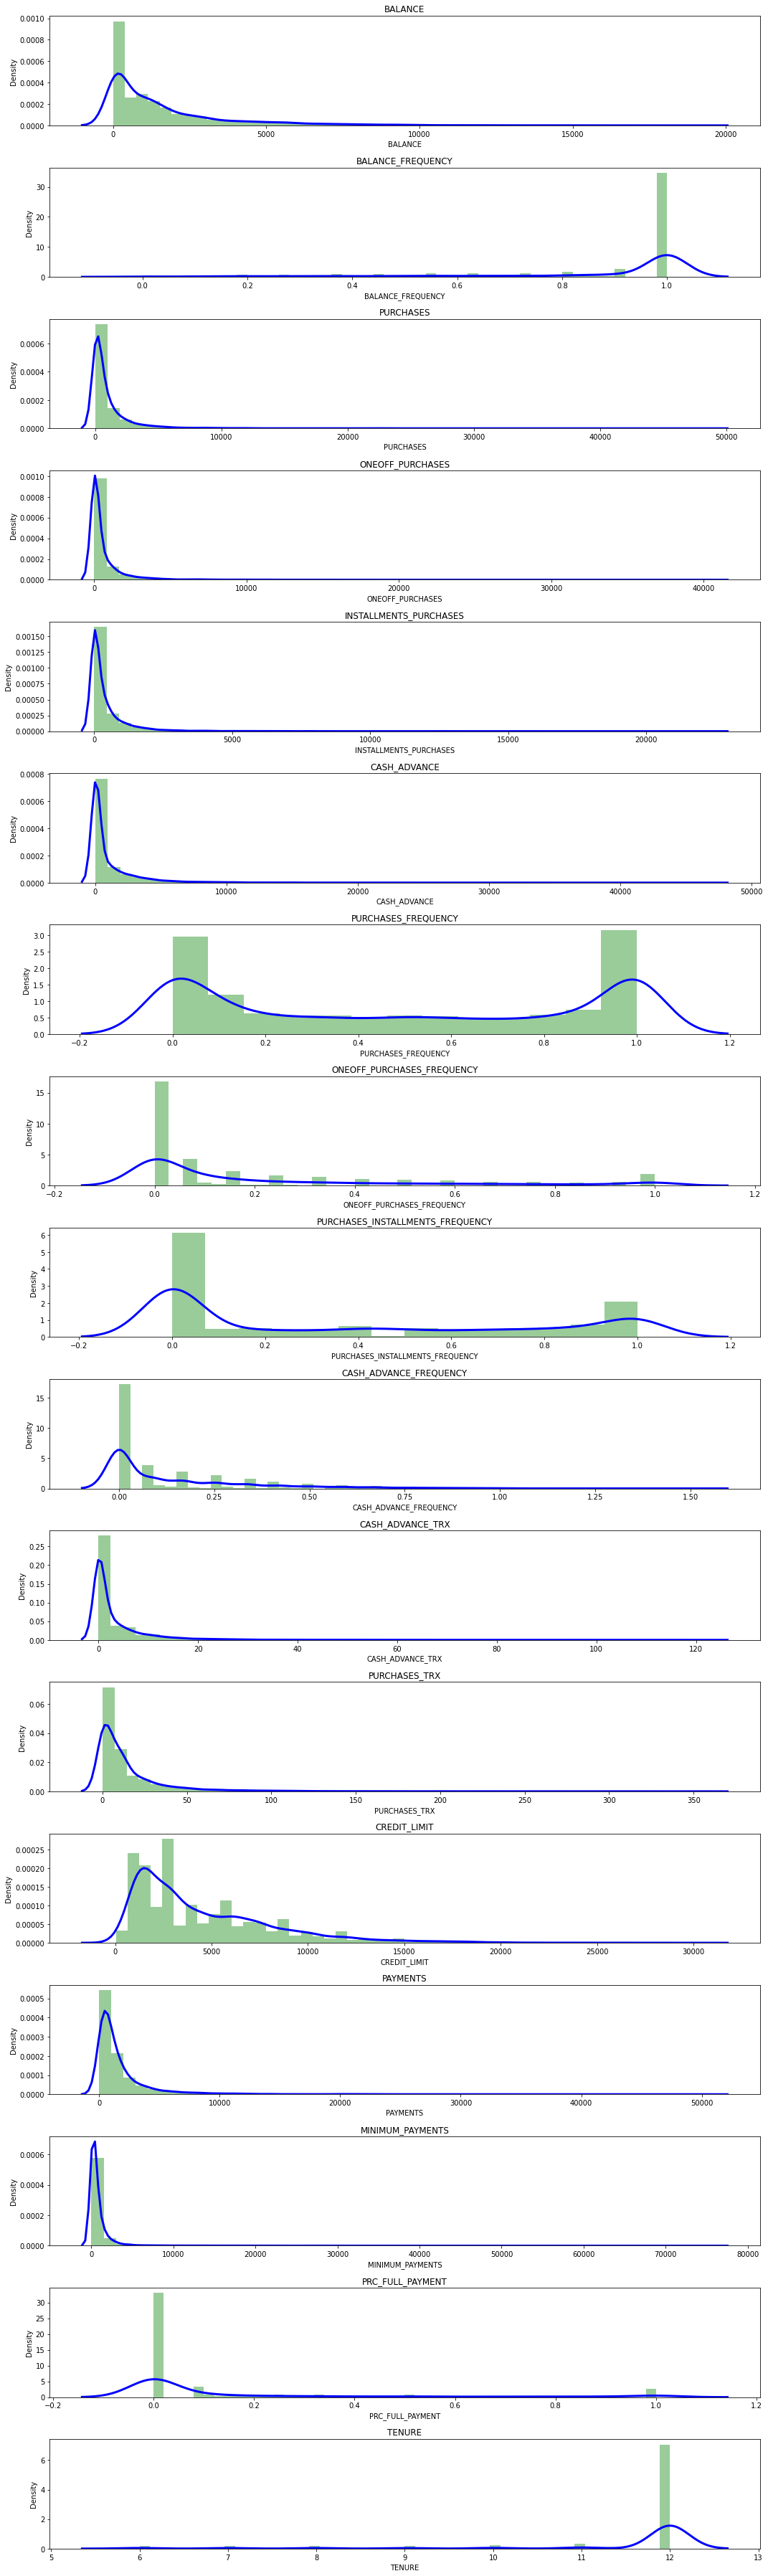

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable.

plt.figure(figsize=(15,50))
for i in range(len(dataset.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(dataset[dataset.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'g'})
  plt.title(dataset.columns[i])

plt.tight_layout()

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure


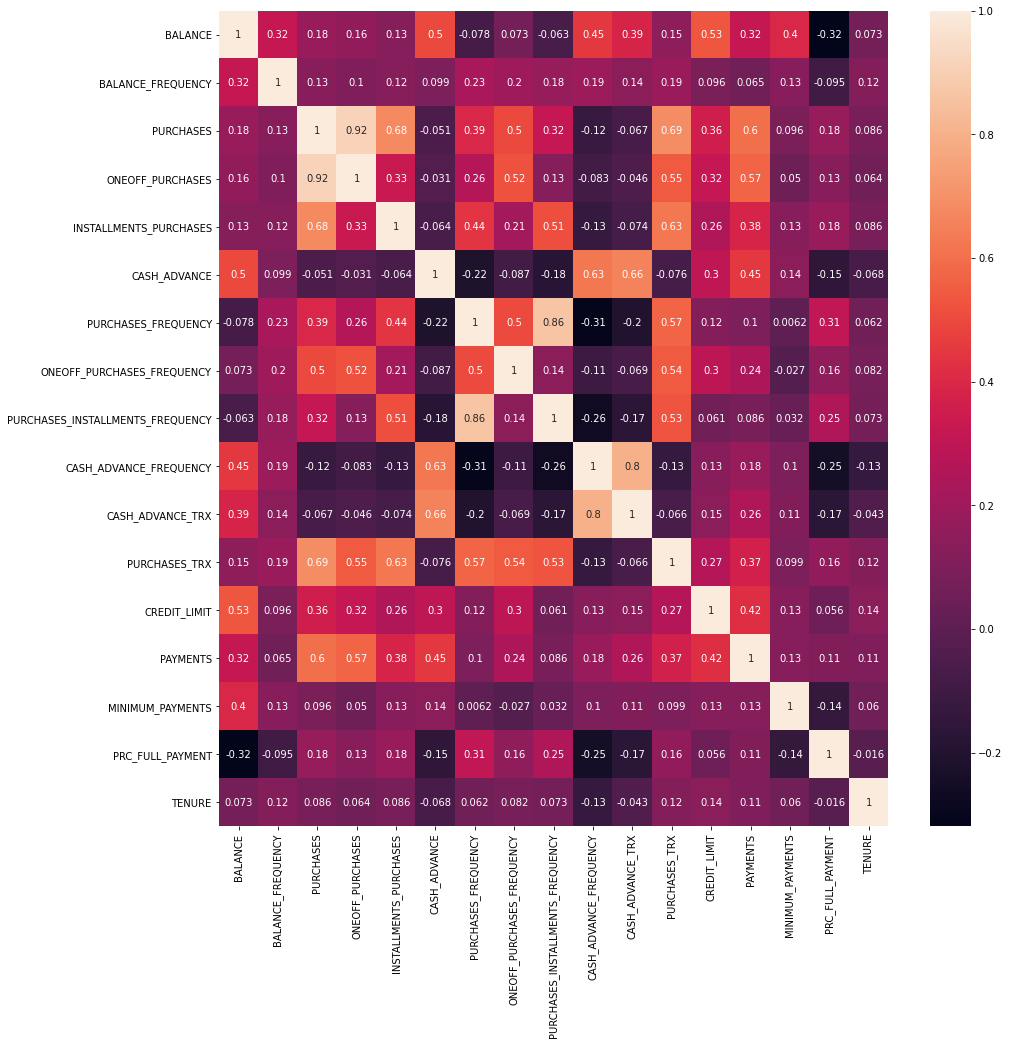

In [ ]:
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
correlation = dataset.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)

In [ ]:

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [ ]:
x = dataset.values

In [ ]:
sc_x = StandardScaler()
x    = sc_x.fit_transform(x)

In [ ]:
# Obtain the principal components 
pca = PCA(2)
principal_comp = pca.fit_transform(x)

### note that if we do inverse_transform of the principal_comp , we won't get the original data because we lost some information

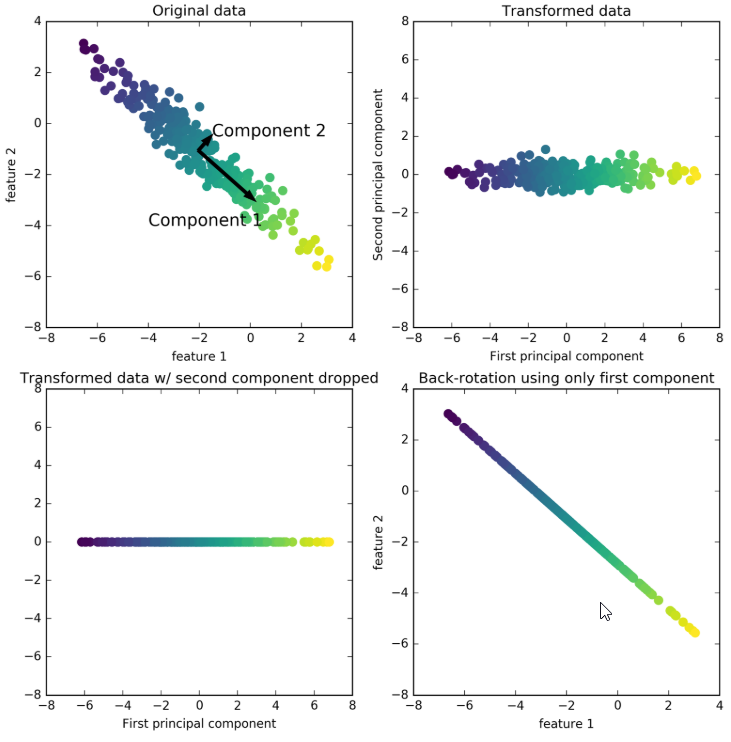

In [ ]:
# Create a dataframe with the two components
pc_df = pd.DataFrame(principal_comp,columns=['pc1','pc2'])
pc_df.head()

,pc1,pc2
0,-1.683650,-1.072238
1,-1.134087,2.509154
2,0.969399,-0.383605
3,-0.888222,0.004654
4,-1.600021,-0.683794


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

In [ ]:
wcss = []
for k in range(1,20):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(principal_comp)
  wcss.append(kmeans.inertia_)

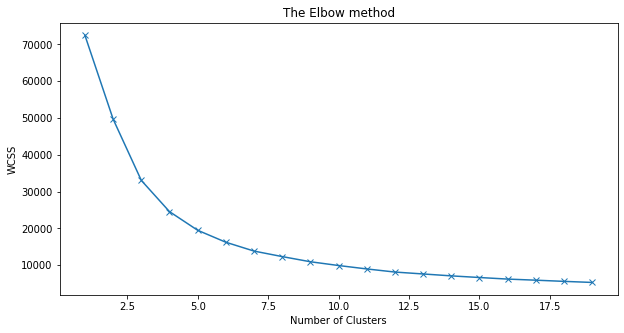

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,20),wcss,'x-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow method')
plt.show()

In [ ]:
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 8.

# TASK #6: APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(principal_comp)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(8, 2)

In [ ]:
# concatenate the clusters labels to our original dataframe
clusters_df = pd.concat((dataset,pd.DataFrame({'cluster':labels})),axis=1)
clusters_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


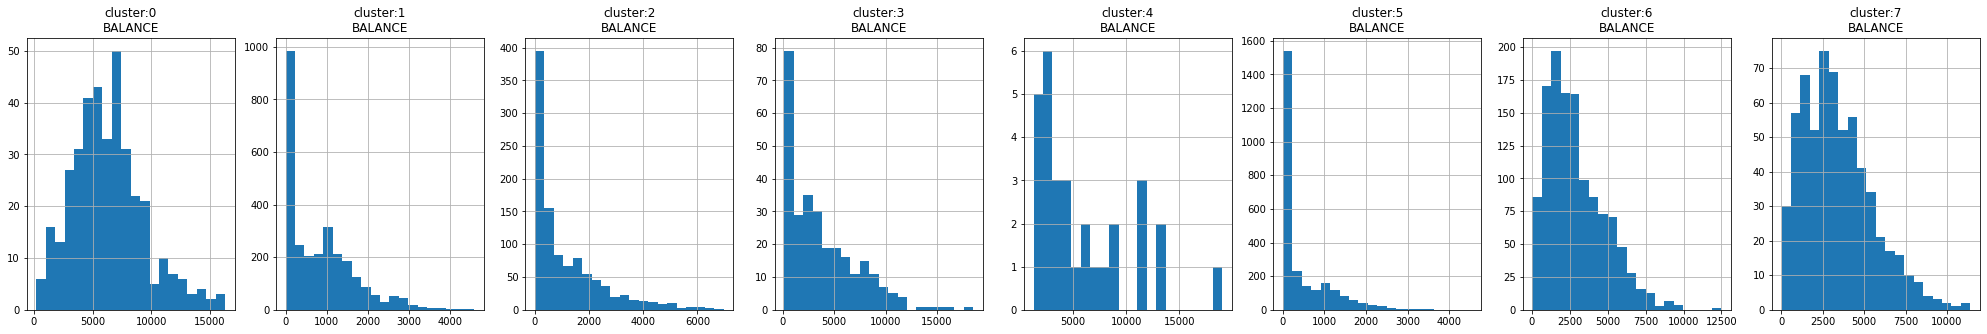

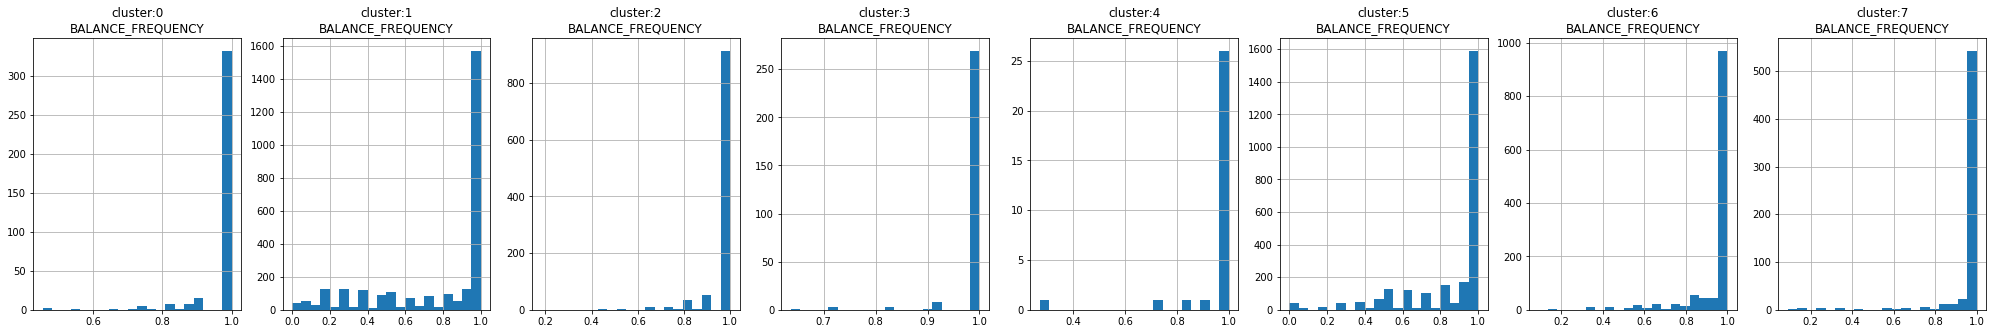

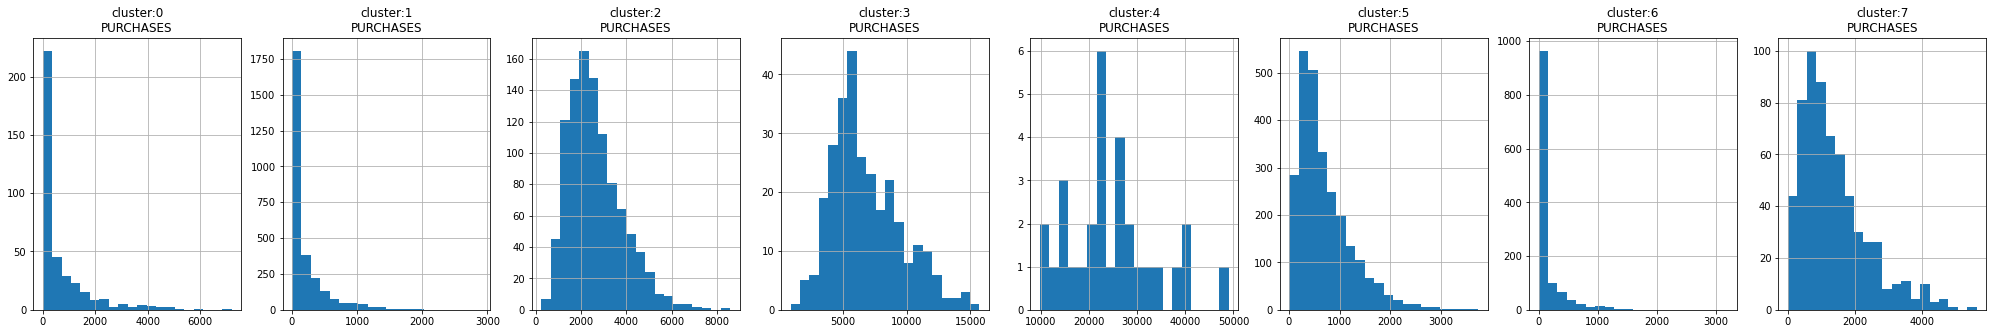

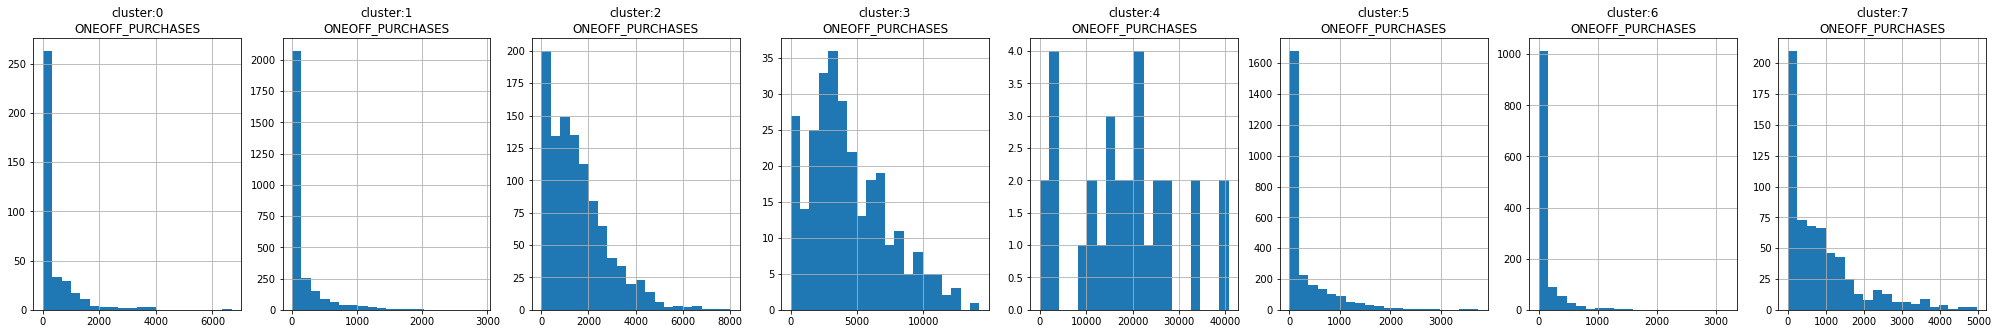

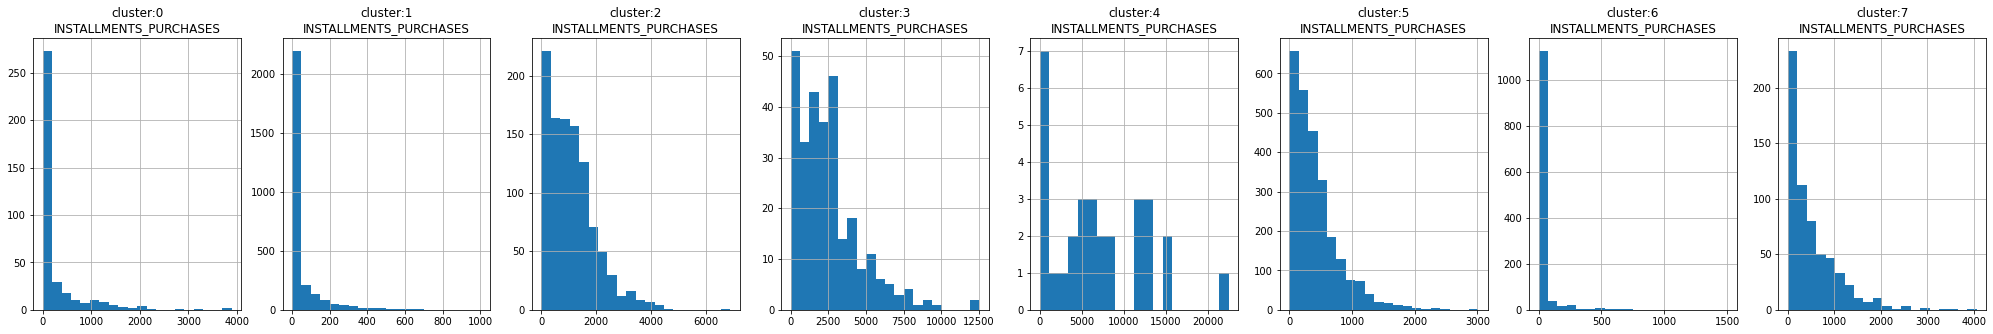

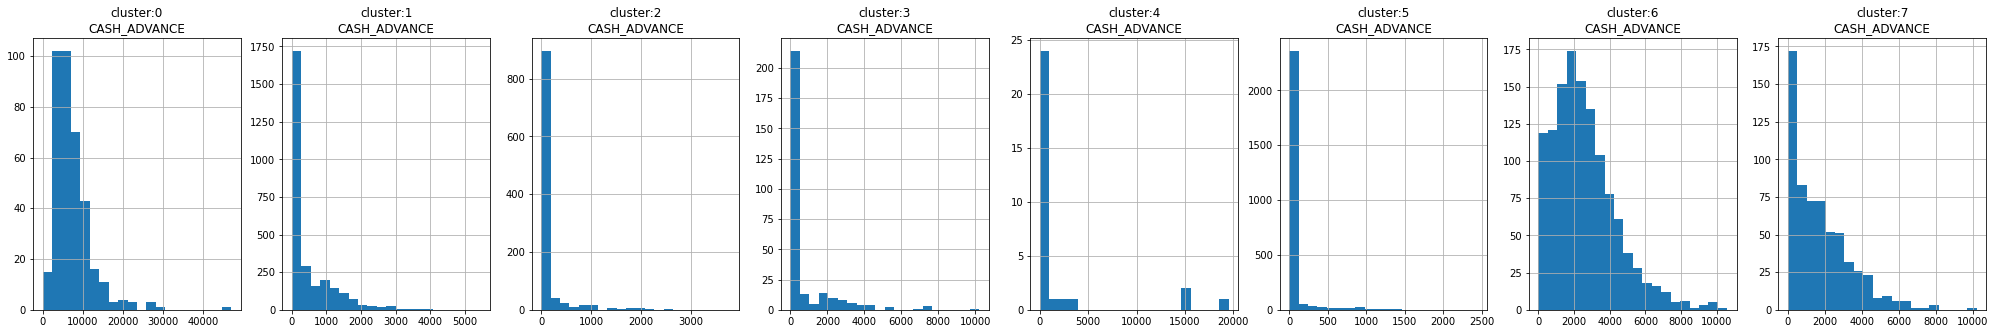

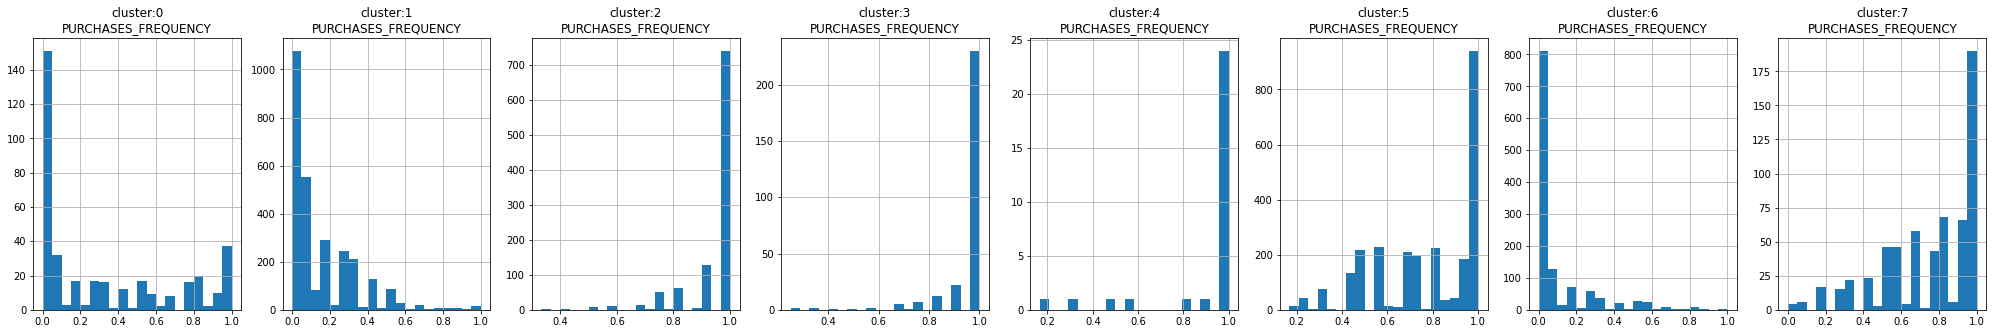

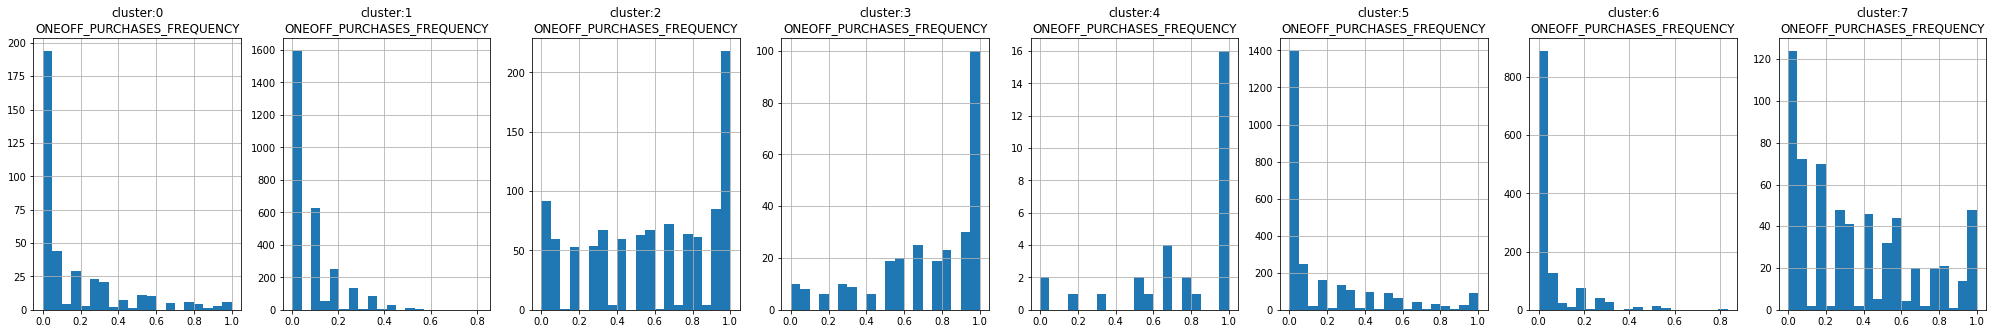

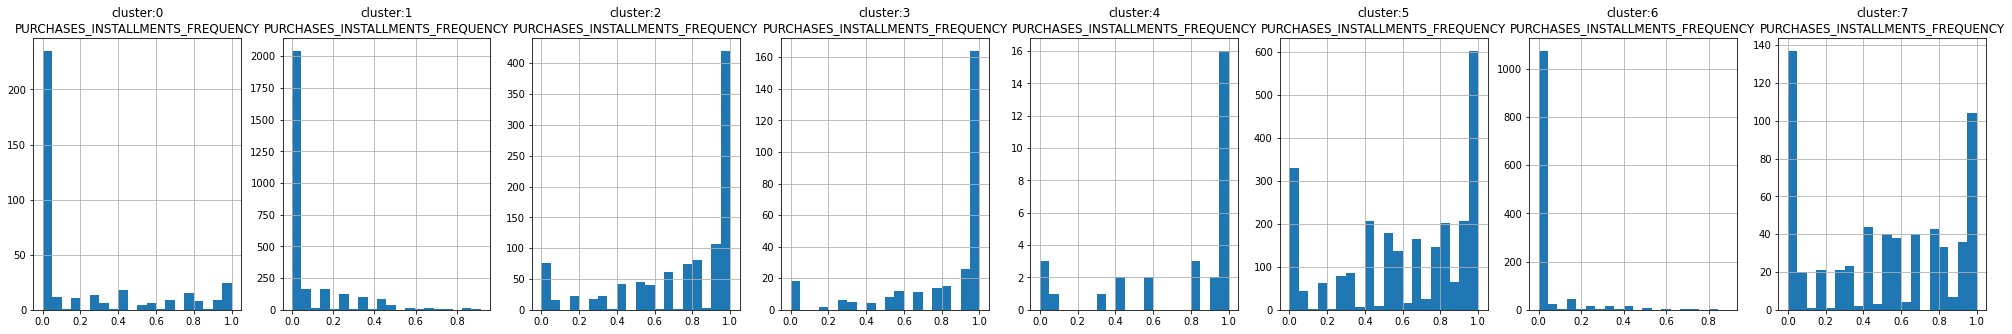

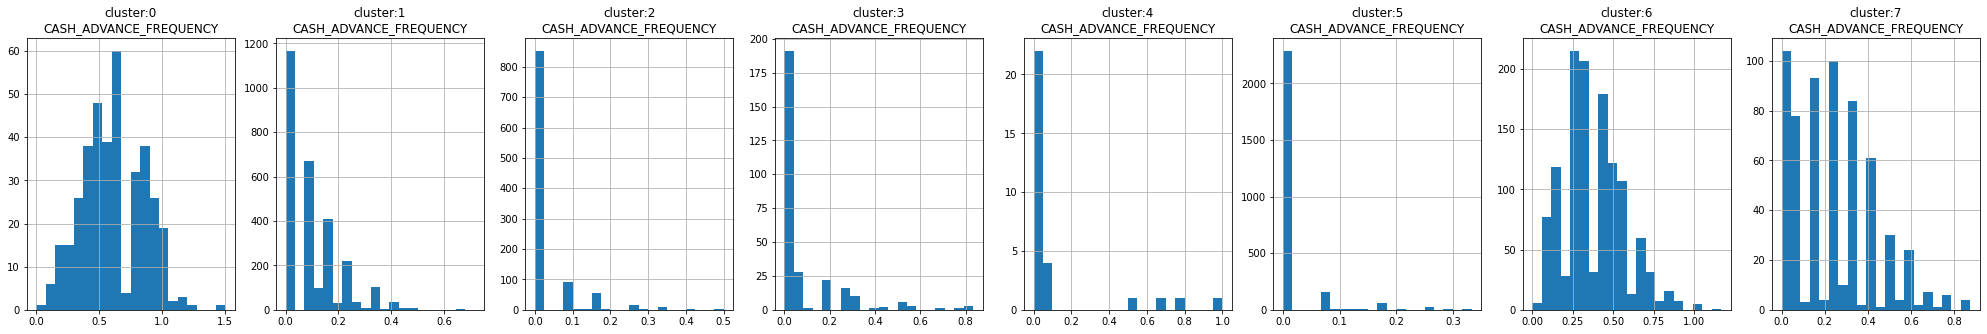

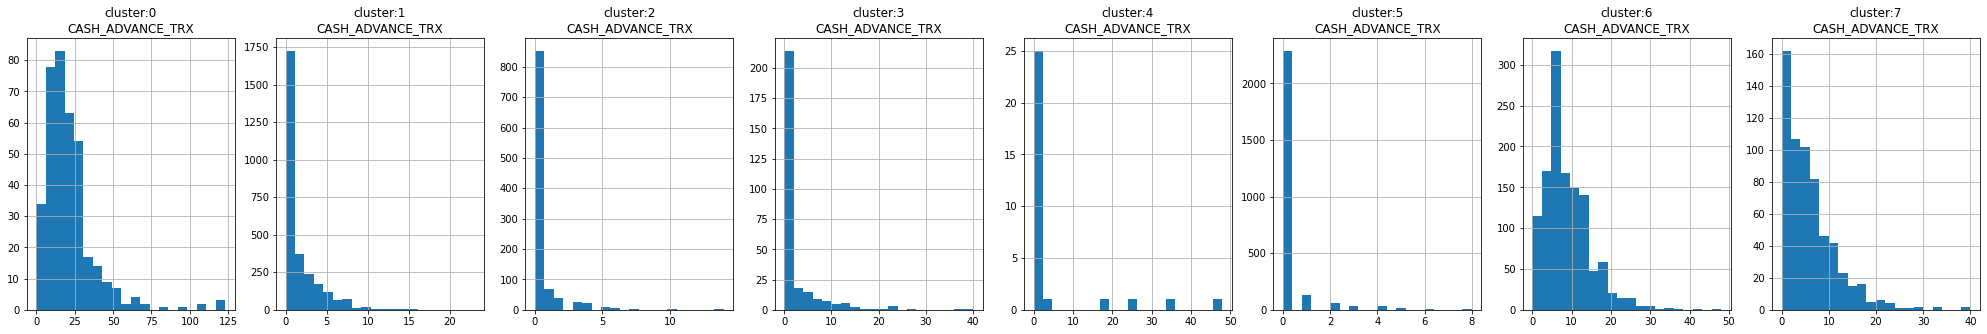

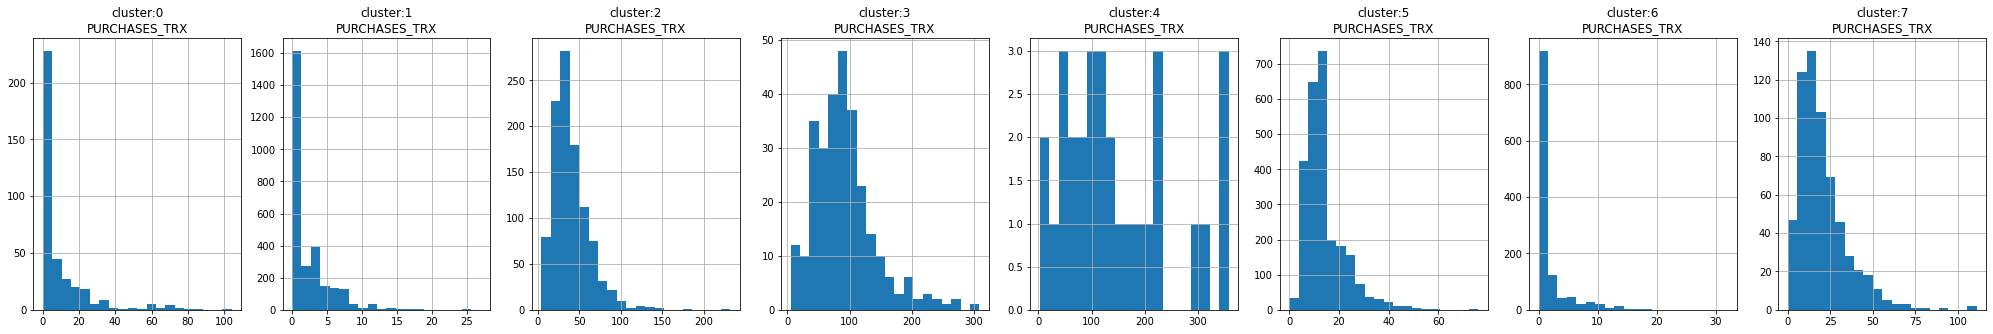

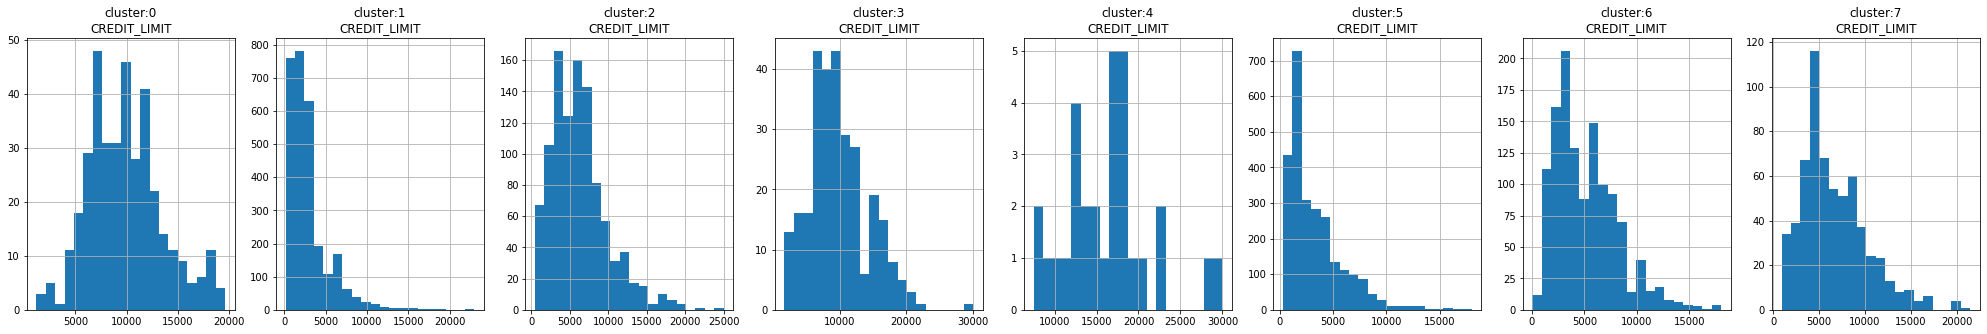

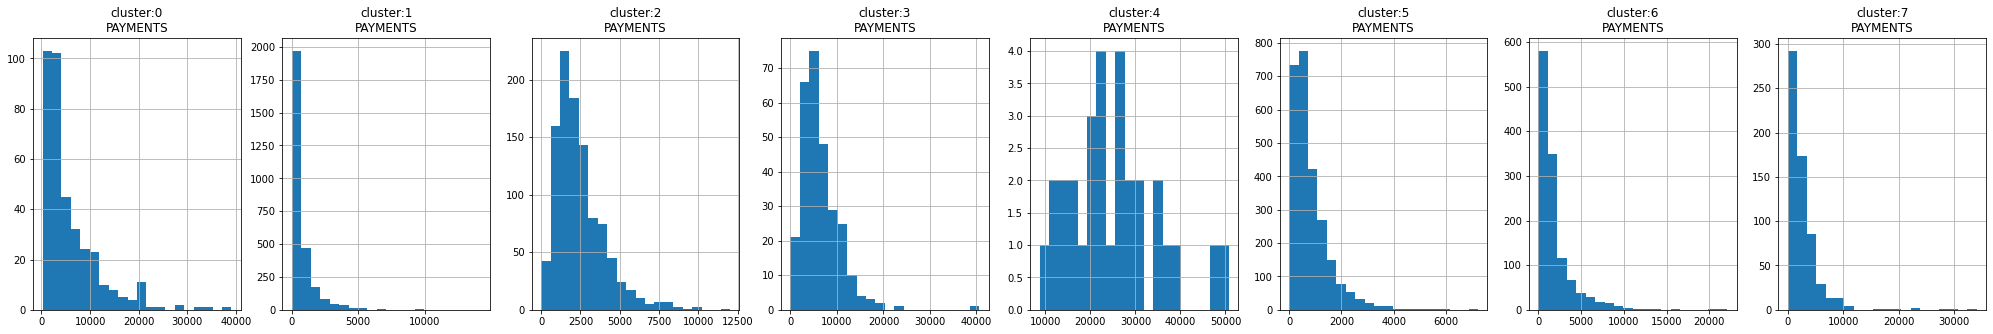

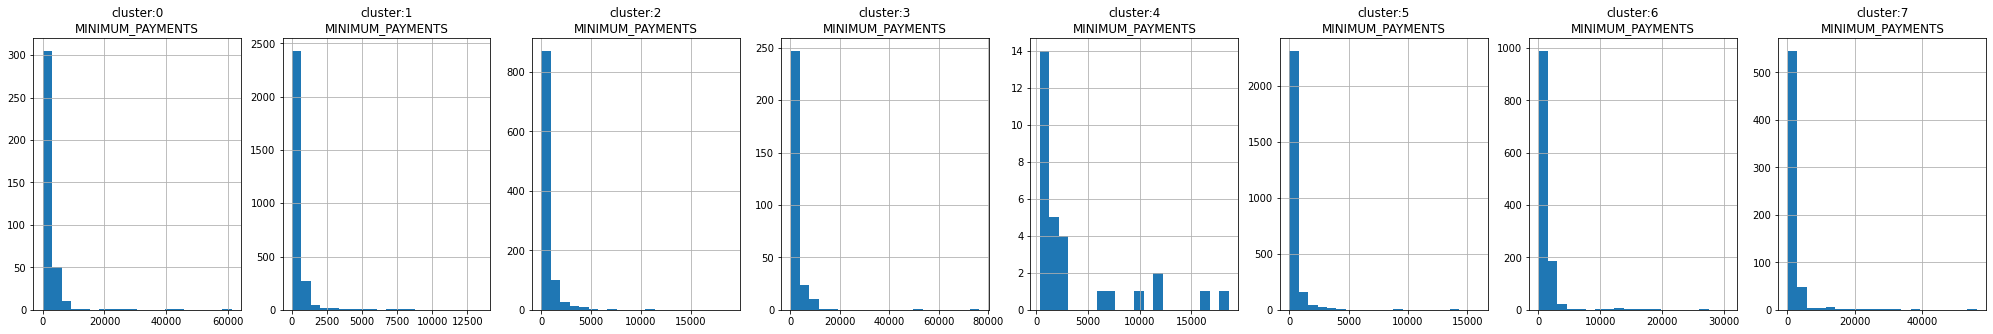

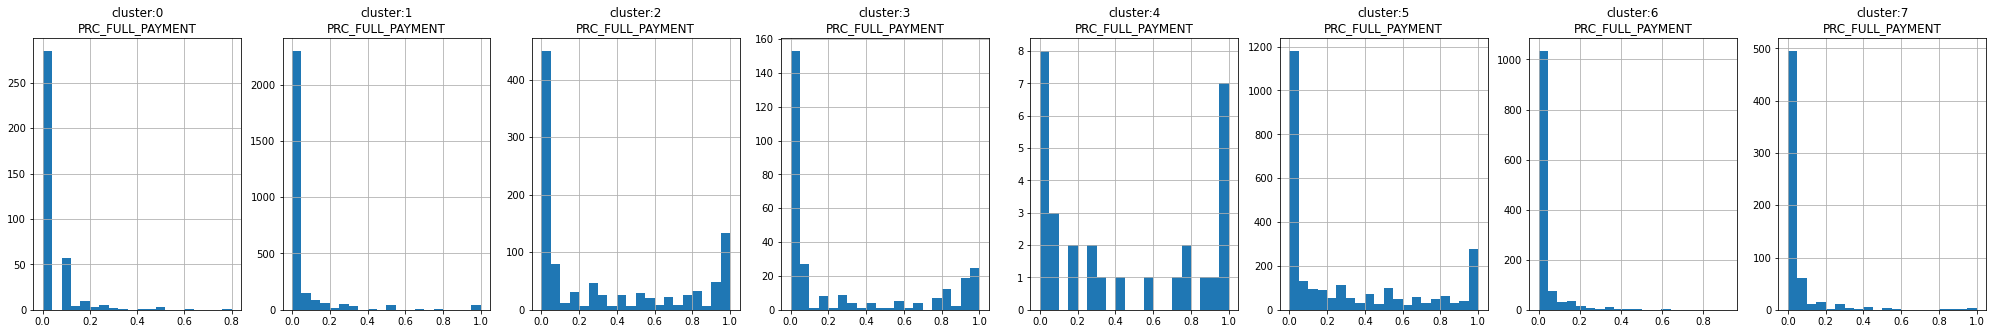

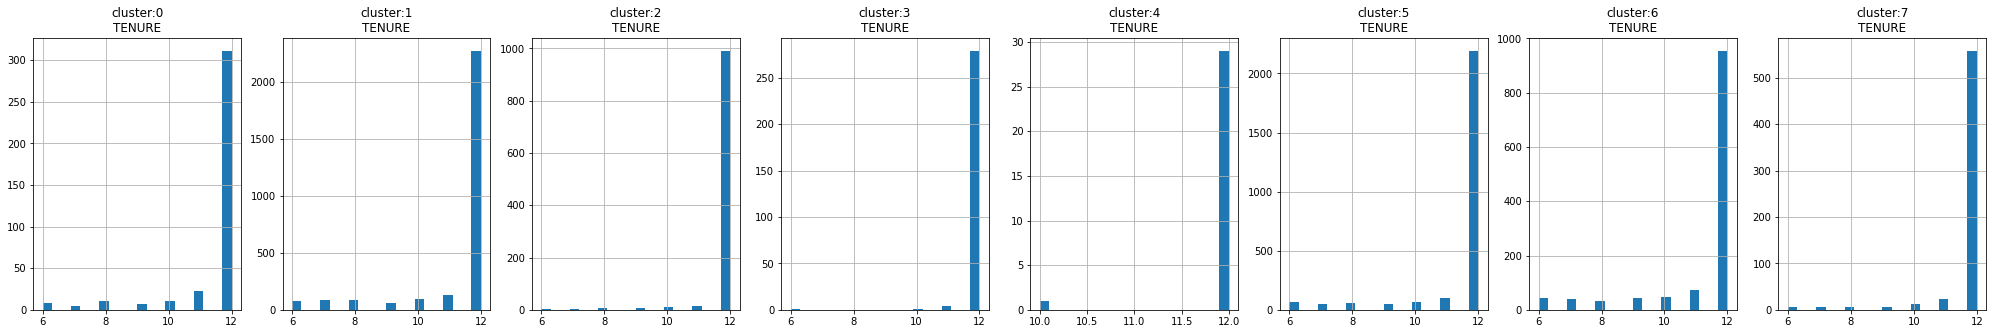

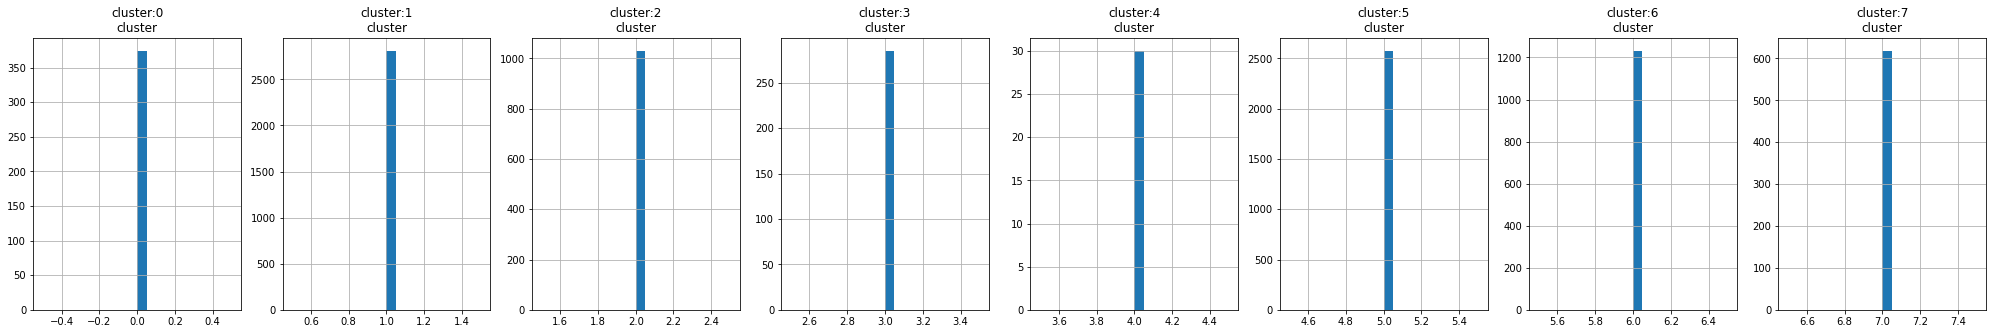

In [ ]:
# Plot the histogram of various clusters
for column in clusters_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = clusters_df[clusters_df.cluster==j]
    cluster[column].hist(bins=20)
    plt.title(f'cluster:{j}\n{column}')
  plt.show()

## Visualizing results

In [ ]:
pc_df = pd.concat((pc_df,pd.DataFrame({'cluster':labels})),1)

In [ ]:
pc_df.head()

,pc1,pc2,cluster
0,-1.683650,-1.072238,1
1,-1.134087,2.509154,6
2,0.969399,-0.383605,5
3,-0.888222,0.004654,1
4,-1.600021,-0.683794,1


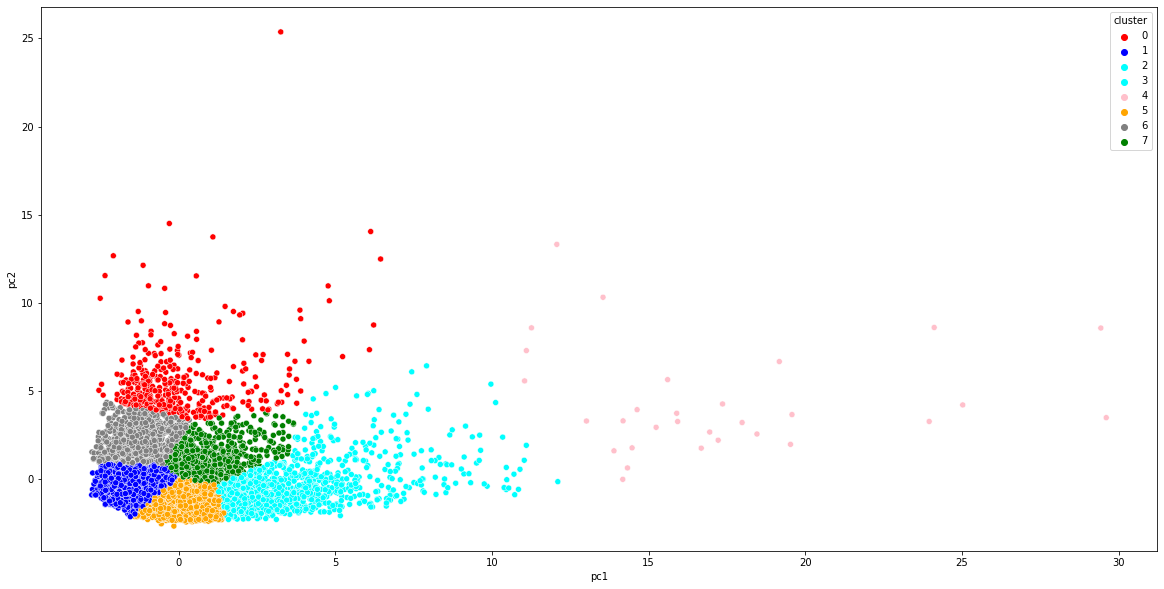

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='pc1',y='pc2',hue='cluster',data=pc_df,palette = ['red','blue','aqua','cyan','pink','orange','grey','green'])
plt.show()

In [ ]:
clusters_df[clusters_df.cluster == 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.0
mean,6316.166614,0.979824,655.366818,406.375267,249.170561,7310.270766,0.317857,0.156780,0.212098,0.609093,21.866310,9.379679,9868.850267,5877.581703,2781.740603,0.037007,11.526738,0.0
std,3059.510007,0.068821,1075.001913,784.930655,546.307512,4819.695151,0.365371,0.239134,0.336018,0.241073,17.543612,16.227446,3613.952930,5807.082996,5055.962871,0.092090,1.284296,0.0
min,198.035504,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,217.059511,19.492021,0.000000,6.000000,0.0
25%,4242.786182,1.000000,0.000000,0.000000,0.000000,4233.305745,0.000000,0.000000,0.000000,0.416667,11.000000,0.000000,7000.000000,2032.633686,1160.442568,0.000000,12.000000,0.0
50%,5977.822912,1.000000,209.485000,0.000000,0.000000,6091.674854,0.166667,0.000000,0.000000,0.583333,17.000000,2.000000,9500.000000,3529.347667,1785.849946,0.000000,12.000000,0.0
75%,7981.592584,1.000000,900.110000,506.160000,227.195000,9114.091418,0.633523,0.250000,0.416667,0.750000,27.000000,12.000000,12000.000000,7952.851348,2683.974697,0.000000,12.000000,0.0
max,16304.889250,1.000000,7194.530000,6678.260000,3887.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,104.000000,19600.000000,39048.597620,61031.618600,0.800000,12.000000,0.0


In [ ]:
for i in range(8):
  mean_balance = clusters_df[clusters_df.cluster == i].describe()['BALANCE']['mean']
  std_balance = clusters_df[clusters_df.cluster == i].describe()['BALANCE']['std']
  print(f'Cluster {i}, mean Balance: {round(mean_balance,2)} , std: {round(std_balance,2)}')

Cluster 0, mean Balance: 6316.17 , std: 3059.51
Cluster 1, mean Balance: 827.85 , std: 828.53
Cluster 2, mean Balance: 1163.03 , std: 1284.66
Cluster 3, mean Balance: 3843.55 , std: 3380.8
Cluster 4, mean Balance: 5972.48 , std: 4490.63
Cluster 5, mean Balance: 454.47 , std: 633.13
Cluster 6, mean Balance: 2906.17 , std: 1894.87
Cluster 7, mean Balance: 3390.59 , std: 2104.75


# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add,Dense,Activation,ZeroPadding2D,BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [ ]:
encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

model = Dense(encoding_dim, activation='relu')(input_df)
model = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(model)
model = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(model)
model = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(model)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(model)

model = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
model = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(model)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(model)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimensionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
autoencoder.fit(x,x,batch_size=128,epochs=30)

Epoch 1/30
70/70 [==============================] - 5s 58ms/step - loss: 0.6692
Epoch 2/30
70/70 [==============================] - 4s 57ms/step - loss: 0.3071
Epoch 3/30
70/70 [==============================] - 4s 56ms/step - loss: 0.2188
Epoch 4/30
70/70 [==============================] - 4s 56ms/step - loss: 0.1694
Epoch 5/30
70/70 [==============================] - 4s 55ms/step - loss: 0.1507
Epoch 6/30
70/70 [==============================] - 4s 55ms/step - loss: 0.1373
Epoch 7/30
70/70 [==============================] - 4s 56ms/step - loss: 0.1342
Epoch 8/30
70/70 [==============================] - 4s 56ms/step - loss: 0.1227
Epoch 9/30
70/70 [==============================] - 4s 57ms/step - loss: 0.1184
Epoch 10/30
70/70 [==============================] - 4s 56ms/step - loss: 0.1133
Epoch 11/30
70/70 [==============================] - 4s 55ms/step - loss: 0.1080
Epoch 12/30
70/70 [==============================] - 4s 55ms/step - loss: 0.1047
Epoch 13/30
70/70 [==================

In [ ]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_17 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_19 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_21 (Dense)             (None, 2000)              2200

In [ ]:
pred = encoder.predict(x)

In [ ]:
pred.shape

(8950, 10)

In [ ]:
wcss1 = []
for k in range(1,20):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pred)
  wcss1.append(kmeans.inertia_)

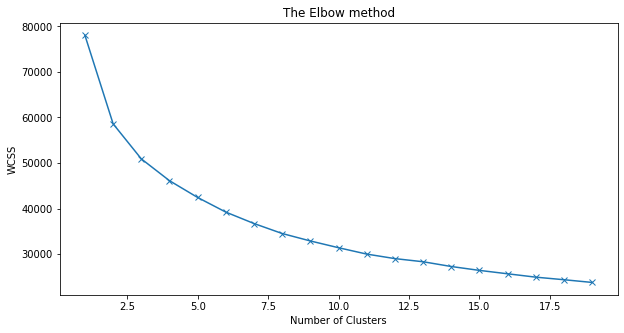

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,20),wcss1,'x-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pred)
labels = kmeans.labels_

In [ ]:
# Obtain the principal components 
pca = PCA(2)
principal_comp2 = pca.fit_transform(pred)

In [ ]:
pc2_df = pd.concat((pd.DataFrame(principal_comp2,columns=['pc1','pc2']),pd.DataFrame({'cluster':labels})),1)
pc2_df.head()

,pc1,pc2,cluster
0,-1.350816,-0.268198,3
1,0.970703,-2.049953,1
2,-1.536032,0.472694,3
3,-0.682302,-0.349035,3
4,-1.653849,-0.339244,3


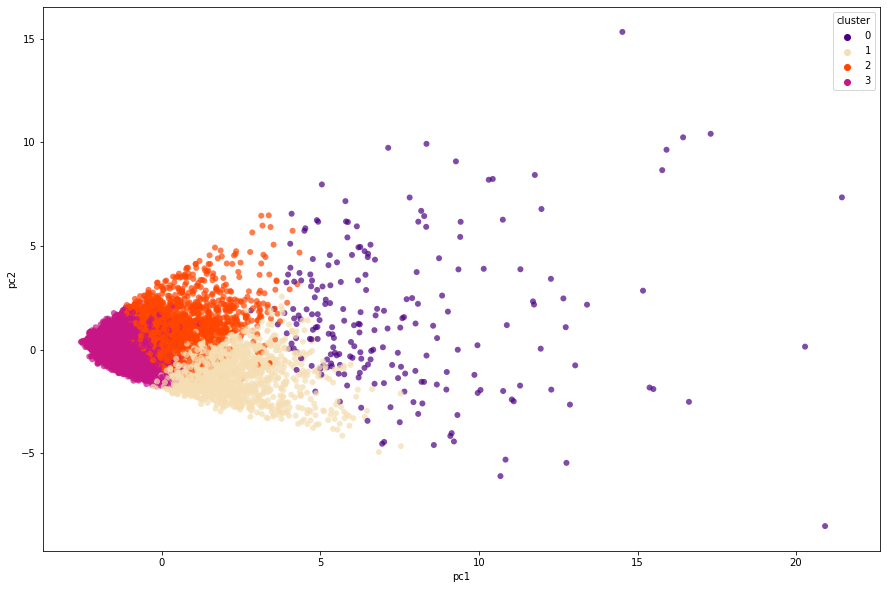

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='pc1',y='pc2',hue='cluster',data=pc2_df,palette = ['Indigo','Wheat','OrangeRed','MediumVioletRed'],alpha=0.7,linewidth=0)

## saving and loading the model

In [ ]:
import os.path
if os.path.isfile('models/autoencoder_weights.h5') is False:
  autoencoder.save_weights('models/autoencoder_weights.h5')

In [ ]:
json = autoencoder.to_json()

In [ ]:
from tensorflow.keras.models import model_from_json

ae = model_from_json(json)

In [ ]:
ae.summary()

In [ ]:
ae.load_weights('models/autoencoder_weights.h5')

In [ ]:
ec = Model(autoencoder.input, autoencoder.layers[-4].output)

In [ ]:
ec.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_17 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_19 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                20010     
Total params: 1,276,636
Trainable params: 1,276,636
Non-trainable params: 0
_________________________________________________

In [ ]:
dc.predict(x)[0]

array([0.        , 0.24904126, 0.        , 0.9962744 , 1.0046517 ,
       0.0132843 , 0.02833082, 1.4355956 , 0.61054426, 0.        ],
      dtype=float32)

In [ ]:
encoder.predict(x)[0]

array([0.        , 0.24904126, 0.        , 0.9962744 , 1.0046517 ,
       0.0132843 , 0.02833082, 1.4355956 , 0.61054426, 0.        ],
      dtype=float32)